# Пример создания сверточных и пуллинг слоев

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D

(8, 9)


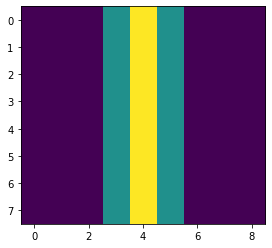

In [3]:
# определение входных данных
data = [[0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0]]

data = np.asarray(data).astype(np.float64)
print(data.shape)
plt.imshow(data)

In [4]:
data = data.reshape(1, 8, 9, 1)

In [5]:
max_pooling = MaxPooling2D(pool_size=(1, 3), strides=(1, 2))
avg_pooling = AveragePooling2D(pool_size=(1, 3), strides=(1, 2))

(1, 8, 4, 1)
[[0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]]


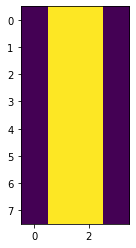

In [6]:
max_pooling_data = max_pooling(data)
print(max_pooling_data.shape)
_, h, w, _ = max_pooling_data.shape
plt.imshow(max_pooling_data.numpy().reshape(h, w))
print(max_pooling_data.numpy().reshape(h, w))

(1, 8, 4, 1)
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]


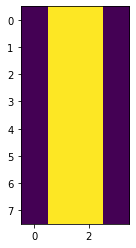

In [7]:
avg_pooling_data = avg_pooling(data)
print(avg_pooling_data.shape)
_, h, w, _ = avg_pooling_data.shape
plt.imshow(avg_pooling_data.numpy().reshape(h, w))
print(avg_pooling_data.numpy().reshape(h, w))

In [8]:
# создание модели
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 9, 1)))

# вывод описания созданной модели
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 7, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers[0].get_weights()[0]

array([[[[-0.25737578]],

        [[ 0.23854733]],

        [[-0.3225041 ]]],


       [[[ 0.41645038]],

        [[ 0.51741767]],

        [[-0.37603274]]],


       [[[-0.01150364]],

        [[-0.11957443]],

        [[-0.31366417]]]], dtype=float32)

In [10]:
# определение дектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]

weights = [np.asarray(detector), np.asarray([0.0])]
# сохранение весов в модель
model.set_weights(weights)

In [11]:
yhat = model.predict(data)
yhat.shape

(1, 6, 7, 1)

In [12]:
yhat.reshape(6, 7)

array([[0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.]], dtype=float32)

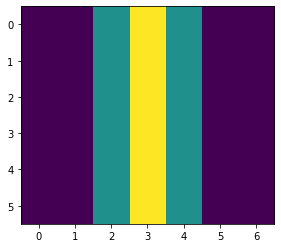

In [13]:
plt.imshow(yhat.reshape(6, 7))

# Нейронная сеть Lenet5

In [14]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow import keras

In [15]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
x_train[0].shape

(28, 28, 1)

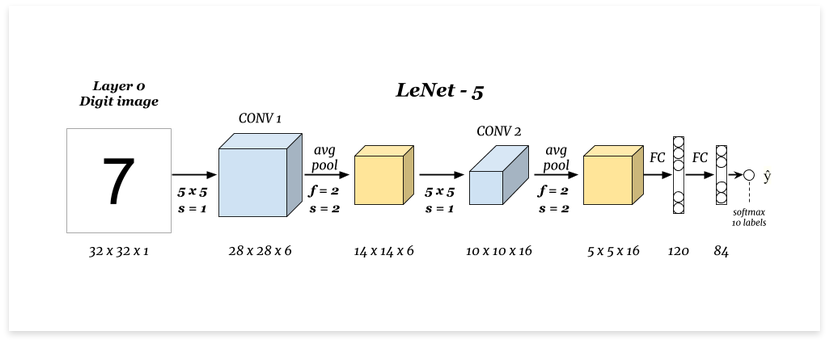

In [17]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# пятый полносвязный слой
model.add(layers.Dense(120, activation='tanh'))

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))

In [18]:
# инициализация пустой модели
model = Sequential()

convolutional = Sequential([
                            layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)),
                            layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
                            layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
                            layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
])

linear = Sequential([
                            layers.Flatten(),
                            layers.Dense(120, activation='tanh'),
                            layers.Dense(84, activation='tanh'),
                            layers.Dense(10, activation='softmax')
])


model.add(convolutional)
model.add(linear)

In [19]:
model.layers[0].layers[0].get_weights()[0].shape

(5, 5, 1, 6)

In [20]:
model.layers[0].layers[1].get_weights()

[]

In [21]:
model.layers[0].layers[2].get_weights()[0].shape

(5, 5, 6, 16)

In [22]:
# компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=x_train,y=y_train, epochs=2, batch_size=128, verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


Epoch 1/2
469/469 [==============================] - 4s 4ms/step - loss: 1.2983 - accuracy: 0.6725
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.8878
Test loss 0.4218, accuracy 88.78%


# Более сложная нейронная сеть

In [23]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os

In [24]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [25]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [26]:
def plot_images(images, labels):
  fig, axes = plt.subplots(1, len(images), figsize = (10, 5))
  for im, l, ax in zip(images, labels, axes):
    ax.imshow(im.reshape(32, 32, 3))
    ax.set_title(l.argmax())

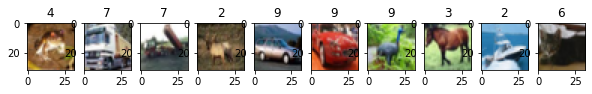

In [27]:
plot_images(x_train[:10], y_train[10:20])

In [28]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [29]:
#datagen[0]

In [30]:
dg = datagen.flow(x_train[:5], batch_size=1)

In [31]:
dg[0]

array([[[[0.4144174 , 0.41201162, 0.37772804],
         [0.40037897, 0.3964574 , 0.38773003],
         [0.48729077, 0.509936  , 0.5400454 ],
         ...,
         [0.31081447, 0.31878394, 0.27463615],
         [0.30980393, 0.31764707, 0.27450982],
         [0.30980393, 0.31764707, 0.27450982]],

        [[0.4144174 , 0.41201162, 0.37772804],
         [0.40037897, 0.3964574 , 0.38773003],
         [0.48729077, 0.509936  , 0.5400454 ],
         ...,
         [0.31081447, 0.31878394, 0.27463615],
         [0.30980393, 0.31764707, 0.27450982],
         [0.30980393, 0.31764707, 0.27450982]],

        [[0.4144174 , 0.41201162, 0.37772804],
         [0.40037897, 0.3964574 , 0.38773003],
         [0.48729077, 0.509936  , 0.5400454 ],
         ...,
         [0.31081447, 0.31878394, 0.27463615],
         [0.30980393, 0.31764707, 0.27450982],
         [0.30980393, 0.31764707, 0.27450982]],

        ...,

        [[0.4163782 , 0.42422393, 0.49942064],
         [0.4912915 , 0.49977568, 0.5559434 ]

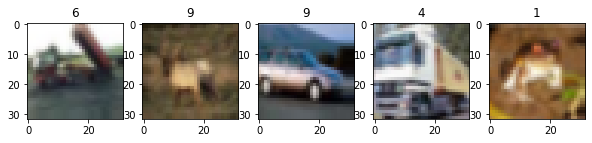

In [32]:
plot_images(dg, y_train[:5])

In [87]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [100]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0015, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [101]:
# запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


391/391 [==============================] - 28s 70ms/step - loss: 0.7517 - accuracy: 0.7573 - val_loss: 0.6602 - val_accuracy: 0.8018
Epoch 2/5
391/391 [==============================] - 26s 65ms/step - loss: 0.7204 - accuracy: 0.7675 - val_loss: 0.6300 - val_accuracy: 0.7982
Epoch 3/5
391/391 [==============================] - 27s 69ms/step - loss: 0.7181 - accuracy: 0.7694 - val_loss: 0.6631 - val_accuracy: 0.8087
Epoch 4/5
391/391 [==============================] - 26s 66ms/step - loss: 0.7167 - accuracy: 0.7704 - val_loss: 0.7149 - val_accuracy: 0.7823
Epoch 5/5
391/391 [==============================] - 27s 68ms/step - loss: 0.7180 - accuracy: 0.7705 - val_loss: 0.6297 - val_accuracy: 0.8073


In [102]:

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.6297 - accuracy: 0.8073
Test loss: 0.6296807527542114
Test accuracy: 0.8072999715805054


In [66]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 


1) изначальная версия\
Test loss: 1.42091965675354 \
Test accuracy: 0.48579999804496765 \
2) dropout первых 2ух слоев с 0.25 на 0.1\
Test loss: 1.301276683807373 \
Test accuracy: 0.5309000015258789 \
3) dropout 3его слоя с 0.5 на 0.2\
Test loss: 1.2864785194396973 \
Test accuracy: 0.5358999967575073 \
4) в 1 слое 64 фильтра вместо 32\
Test loss: 1.2621276378631592 \
Test accuracy: 0.5475999712944031 \
5) в 2 слое 128 фильтров вместо 64\
Test loss: 1.1055313348770142 \
Test accuracy: 0.611299991607666 \
6) в 2 слое 256 фильтров вместо 128\
Test loss: 1.040347695350647 \
Test accuracy: 0.6309000253677368 \
7) lr c 0.0001 до 0.0005\
Test loss: 0.6909540891647339 \
Test accuracy: 0.7644000053405762 \
8) lr до 0.001\
Test loss: 0.6445291042327881 \
Test accuracy: 0.8034999966621399 \
9) lr до 0.0015\
Test loss: 0.6296807527542114 \
Test accuracy: 0.8072999715805054 \

1)Сильнее всего на метрики повлиял шаг(изначально он был очень маленьким и модель не могла перешагнуть локальный минимум) и увеличение количества фильтров. Уменьшение Dropout тоже пошло на пользу, но незначительно. Увеличение числа слоев отразилось даже в худшую сторону, видимо переобучение.

2) В MNIST картинки черно-белые, значит можно было бы обойтись меньшим количеством фильтров. Также не требовалось бы вертеть картинки, потому цифры и буквы на письме не отражают и не переворачивают. С CIFAR100 делалось бы примерно все тоже самое, но слоев бы потребовалось больше, думаю. Для imageNet полагаю, все было бы значительно сложнее) 